# Actividad 2: Clasificación de Noticias Usando RNNs y LSTMs

### Propósito de Aprendizaje
Adquirir habilidades prácticas en el preprocesamiento de datos textuales y en la implementación de modelos avanzados de RNN y LSTM para la clasificación de noticias en categorías especializadas como deportes, cultura, economía y justicia. Al finalizar, los estudiantes habrán desarrollado la capacidad de construir, entrenar y evaluar estos modelos, así como de comparar su rendimiento de manera crítica.

### Producto(s)
- **Cuaderno Jupyter (Jupyter Notebook):** Documentar el proceso completo de preprocesamiento, construcción, entrenamiento, evaluación y comparación de modelos RNN y LSTM.
- **Informe (PDF/Markdown):** Un documento que resuma los hallazgos, compare los modelos RNN y LSTM, y discuta las implicaciones prácticas de los resultados.


### Ejercicio 1: Carga y Exploración de Datos
**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

**Acciones:**
- Cargar el archivo `Noticias.xlsx` que contiene las noticias.
- Explorar la distribución de la columna `Etiqueta` para ver cuántas noticias pertenecen a cada categoría.
- Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

**Contexto:** La columna `Etiqueta` en el conjunto de datos contiene varias categorías, algunas de las cuales no son especializadas o no contienen un enfoque específico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.


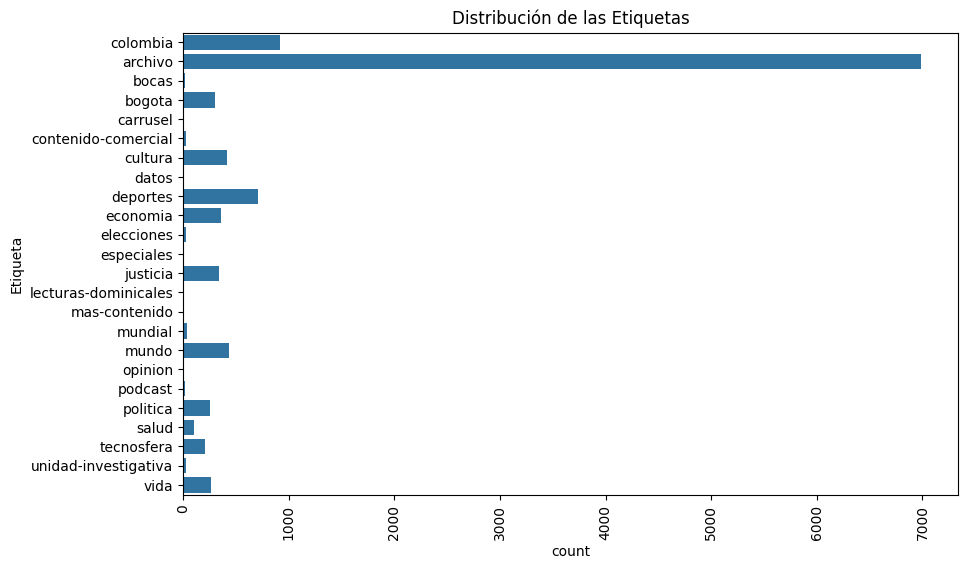

In [10]:

# Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
file_path = 'Noticias.xlsx'
data = pd.read_excel(file_path)

## Quitamos los nulos
data = data.dropna()

# Mostrar las primeras filas del conjunto de datos
data.head()

# Visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(data['Etiqueta'])
plt.title('Distribución de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

### Ejercicio 2: Filtrado de Datos
**Objetivo:** Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

**Acciones:**
- Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.
- Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.


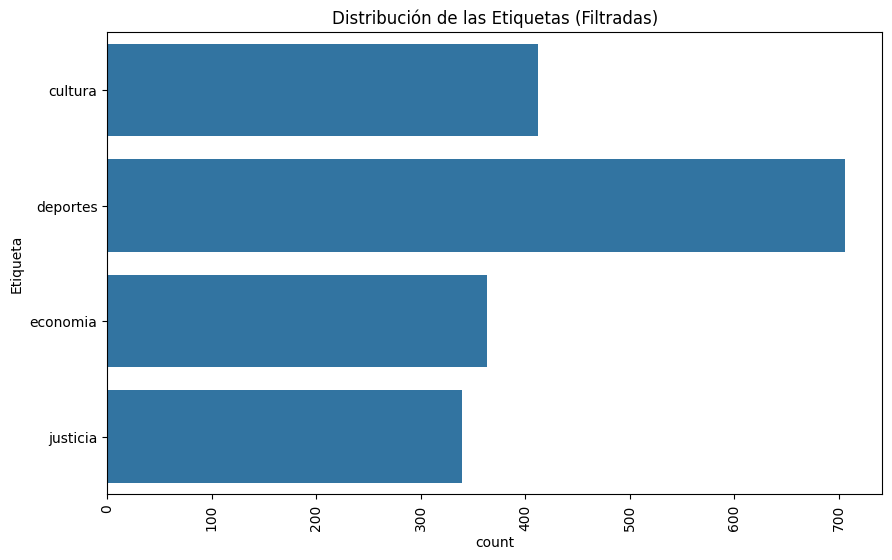

In [11]:
# Filtrar las categorías relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data_filtrada = data[data['Etiqueta'].isin(categorias_relevantes)]

# Visualizar la distribución de las etiquetas después del filtrado
plt.figure(figsize=(10, 6))
sns.countplot(data_filtrada['Etiqueta'])
plt.title('Distribución de las Etiquetas (Filtradas)')
plt.xticks(rotation=90)
plt.show()



### Ejercicio 3: Preprocesamiento de Texto
**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.

**Acciones:**
- Convertir todo el texto a minúsculas para uniformidad.
- Eliminar puntuación y números para reducir el ruido en los datos.
- Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
- Tokenizar el texto, es decir, dividir el texto en palabras individuales.


Para este ejercicio debe instalarse la libreria keras y tensorflow, para ello se debe ejecutar el siguiente comando en la consola de anaconda:
```python
pip install keras tensorflow
```

In [12]:
pip install keras tensorflow

In [13]:
!pip install tensorflow
!pip install keras_nlp
!pip uninstall tf-keras
!pip install "keras_nlp[tensorflow]<0.17"

In [16]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import keras_nlp
import tensorflow as tf

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    return ' '.join(tokens)

# Aplicar preprocesamiento
data_filtrada.loc[:,'contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
# Tokenizar el texto

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_filtrada['contenido_preprocesado'])
sequences = tokenizer.texts_to_sequences(data_filtrada['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

## También puede usar las técnicas de preprocesamiento de texto y de embedding que hicimos anteriormente




array([[ 1220, 19886,     6,   113,  1220, 27325,   318,  2949,     5,
         2880,     6,  6795,  6795,  7846, 27326,  1220,  2567,     5,
        27327,  1187,  7270,  4100,  1496,     6,   450,  7270, 27328,
         1772, 27329,   122,     5,   149,     6,   313, 27330,  1994,
          644,  7270,     5,    54,   313,  3326,  1600,   650,   954,
         4626, 11714,    24,     1,    46,    29,    17,    43,    38,
           47,    40,    15,    30,    39,    25,     7,    22,     4,
            1,    32,    31,    33,    23,    27,    45,    41,     2,
           13,    26,    50,     4,     1,    34,     8,    28,    21,
            9,    48,    12,     2,     1,    37,    42,    35,    16,
            3,    20,     1,    44,    11,    18,    19,    49,     3,
           36],
       [  220,    68,    69,    51,    92,   323,   215,  1708, 27354,
         9338,   178, 15995,  1253,   221,  4428,   239,   791,   215,
          180,    55,   726,  3526,  9346,    96,   410,  227

### Ejercicio 4: División del Conjunto de Datos
**Objetivo:** Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.

**Acciones:**
- Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
- Asegurarse de que la división sea aleatoria pero mantenga una proporción similar de las categorías en ambos conjuntos.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
data_filtrada.loc[:,'Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada['Etiqueta'])

# División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, data_filtrada['Etiqueta_codificada'], test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)


(1456, 364)

## Ejercicio 5: Construcción y Entrenamiento de Modelos RNN

**Objetivo:** Implementar un modelo de Red Neuronal Recurrente (RNN) para clasificar noticias en las categorías especializadas.

**Acciones:**
- Construir un modelo RNN utilizando capas de Embedding, SimpleRNN y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.3998 - loss: 1.2995 - val_accuracy: 0.5934 - val_loss: 1.0517
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.8610 - loss: 0.6448 - val_accuracy: 0.8269 - val_loss: 0.5438
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9965 - loss: 0.0978 - val_accuracy: 0.7885 - val_loss: 0.6330
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9971 - loss: 0.0341 - val_accuracy: 0.7665 - val_loss: 0.6390
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.7802 - val_loss: 0.6062
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.7692 - val_loss: 0.6528
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9998 - loss: 0.0056 - val_accuracy: 0.7940 - val_loss: 0.6255
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.7692 - val_loss:

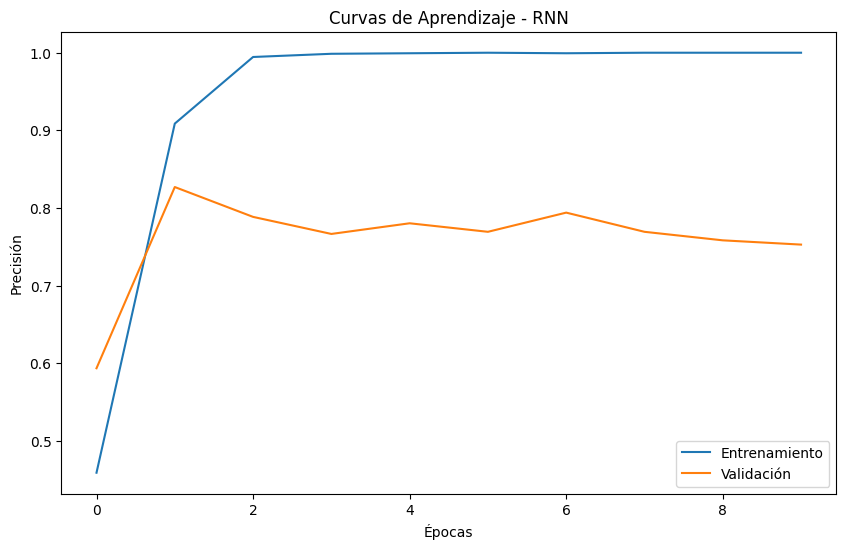

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()


## Ejercicio 6: Construcción y Entrenamiento de Modelos LSTM

**Objetivo:** Implementar un modelo de Red Neuronal LSTM (Long Short-Term Memory) para clasificar noticias en las categorías especializadas.

**Acciones:**

- Construir un modelo LSTM utilizando capas de Embedding, LSTM y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.3698 - loss: 1.3541 - val_accuracy: 0.3709 - val_loss: 1.3469
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.3798 - loss: 1.3376 - val_accuracy: 0.3709 - val_loss: 1.3504
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.3793 - loss: 1.3424 - val_accuracy: 0.3709 - val_loss: 1.3474
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.3951 - loss: 1.3289 - val_accuracy: 0.3709 - val_loss: 1.3457
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.3789 - loss: 1.3316 - val_accuracy: 0.3709 - val_loss: 1.3471
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.3946 - loss: 1.3238 - val_accuracy: 0.3709 - val_loss: 1.3477
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.3915 - loss: 1.3242 - val_accuracy: 0.3709 - val_loss: 1.3480
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.3965 - loss: 1.3218 - val_accuracy

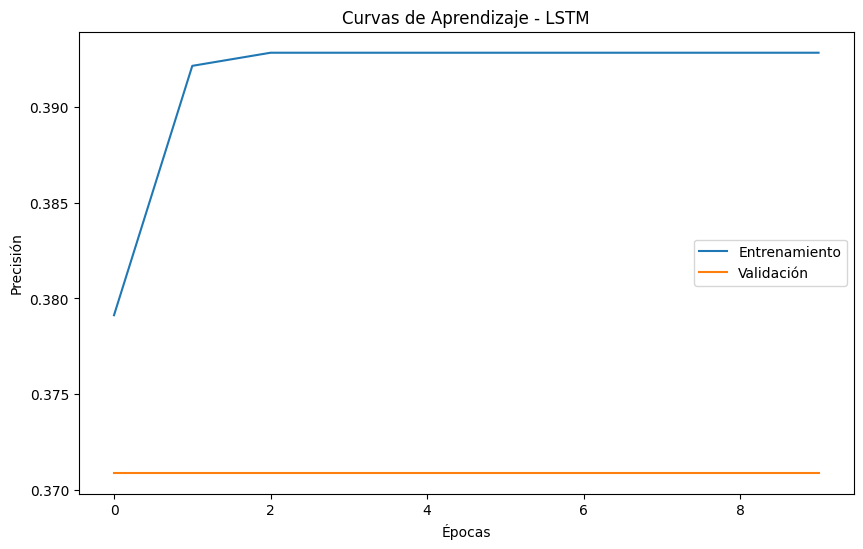

In [21]:
from keras.layers import LSTM

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(units=64, return_sequences=False))
model_lstm.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()


## Ejercicio 7: Comparación de Modelos y Análisis de Resultados

**Objetivo:** Comparar los modelos RNN y LSTM en términos de rendimiento y analizar los resultados obtenidos.

**Acciones:**
- Comparar la precisión y la pérdida de los modelos RNN y LSTM en el conjunto de datos de validación.
- Calcula otras métricas de evaluación como la sensibilidad, la especificidad y el puntaje F1.
- Discutir las fortalezas y debilidades de cada modelo en función de los resultados obtenidos.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.74      0.68      0.71        79
     cultura       0.87      0.82      0.85       135
    economia       0.67      0.72      0.70        78
    justicia       0.65      0.74      0.69        72

    accuracy                           0.75       364
   macro avg       0.74      0.74      0.74       364
weighted avg       0.76      0.75      0.75       364

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00        79
     cultura       0.37      1.00      0.54       135
    economia       0.00      0.00      0.00        78
    justicia       0.00      0.00      0.00        72

    accuracy                           0.37       364
   macro avg       0.09      0.25      0.14       364
weighted avg       0.14      0.37      0.20       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


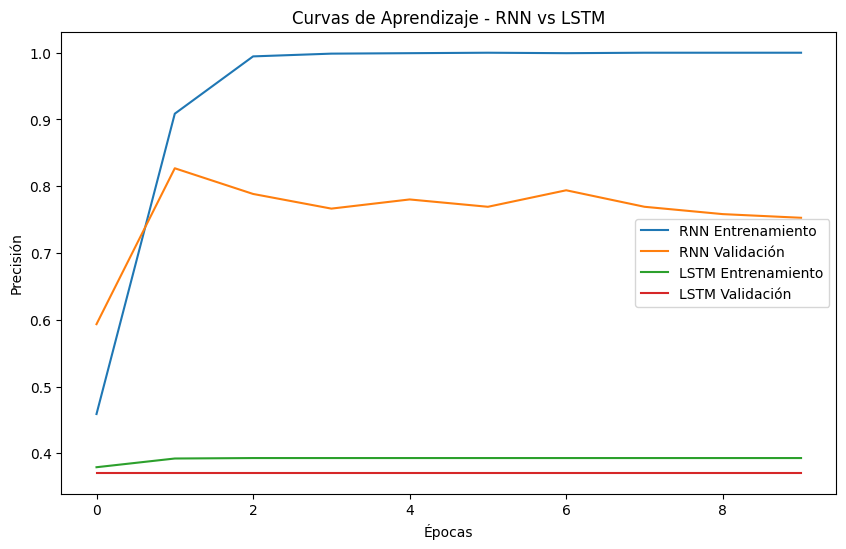

In [22]:
from sklearn.metrics import classification_report

# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = model_lstm.predict(X_val).argmax(axis=1)

# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categorias_relevantes)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categorias_relevantes)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validación')
plt.plot(history_lstm.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()


## Ejercicio 8: Conclusiones y Recomendaciones

**Objetivo:** Resumir los hallazgos y proporcionar recomendaciones basadas en los resultados obtenidos.

**Acciones:**
- Resumir las principales conclusiones de la comparación entre los modelos RNN y LSTM.
- Proporcionar recomendaciones para mejorar el rendimiento de los modelos o explorar enfoques alternativos.
- Discutir las implicaciones prácticas de los resultados y cómo podrían aplicarse en un contexto real.
